In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 세부사항

- X 데이터와 Y 데이터가 하나의 파일(csv)에 있음
- 학습 데이터와 테스트 데이터의 비율은 80% : 20%
- 모든 데이터(컬럼,로우)를 학습에 사용할 필요는 없습니다.
- 실제 모델 결과보다 모델을 만들기까지의 과정이 중요합니다.
- 어떠한 논리로 분석을 진행하였는지 설명을 세부적으로 적어주시길 바랍니다.
- 머신러닝을 사용한 모델링 과정을 하나 이상 넣어 주시길 바랍니다.

# 차량 이미지 데이터 (Classification)

국내 차량 이미지 데이터를 보고 차량 클래스를 구분하는 모델을 만드시오.총 24,916개의 국산 차량 이미지 데이터가 있다.

활용 예: CCTV나 자율주행차 개발에서 주위 차량 Detection 모델

이미지는 30 x 30 x 3 짜리 이미지 가 픽셀 값으로 들어가 있고 마지막 컬럼에는 해당 차량의 클래스가 들어가 있다.

파일명 : kcar.pkl (압축 형식 : Gzip)

https://www.aihub.or.kr/aidata/130

평가 지표 : Accuracy

In [30]:
train = pd.read_pickle("drive/My Drive/kcar.pkl", compression='gzip')
train.shape

(24916, 2701)

In [31]:
train.head() # 2700개의 픽셀과 1개의 라벨

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700
0,230,236,252,226,232,248,220,227,245,214,223,240,212,220,241,206,219,238,204,216,240,199,215,238,199,215,241,193,213,238,189,208,238,183,207,235,181,204,236,177,...,28,28,28,23,24,26,18,22,23,18,21,26,17,22,26,14,21,27,13,20,26,11,16,20,15,20,23,20,21,25,22,24,23,37,35,36,55,54,52,G80스포츠
1,235,238,243,251,254,255,251,255,255,242,249,255,239,246,255,248,255,255,247,255,255,238,248,255,246,255,255,249,255,255,251,255,255,249,250,255,248,248,250,251,...,54,59,62,46,53,59,40,47,55,36,45,54,36,44,55,38,46,59,40,48,59,33,39,51,38,45,53,42,45,50,51,52,54,69,70,65,124,123,118,G80스포츠
2,94,112,134,85,103,125,76,97,118,80,101,122,95,116,137,109,130,151,114,137,155,114,137,155,112,133,150,121,143,157,86,105,120,66,86,97,127,145,157,189,...,41,53,65,41,54,63,51,64,73,64,77,86,66,79,88,55,68,76,42,55,63,51,64,70,50,63,69,48,62,65,52,66,69,67,78,82,80,91,95,G80스포츠
3,80,88,90,68,76,78,79,83,84,122,126,125,178,178,178,211,211,209,221,217,214,216,213,208,223,218,214,213,208,202,204,201,194,205,202,195,208,208,200,209,...,53,64,84,54,65,85,52,64,80,55,67,81,66,79,88,77,90,99,84,97,105,64,77,83,63,76,82,63,76,84,84,97,105,82,92,102,104,114,124,G80스포츠
4,215,229,194,212,222,195,210,217,201,217,218,213,226,223,232,229,221,236,222,211,227,213,201,211,213,203,204,216,209,199,221,215,201,218,217,197,210,211,195,205,...,31,47,60,42,58,71,51,67,80,58,72,83,61,75,86,62,76,85,63,77,86,87,101,110,94,108,117,84,99,106,94,109,116,99,114,119,81,96,101,G80스포츠


In [32]:
# X와 y로 나누기
# X는 한 픽셀을 Feature로 잡은 것 입니다.
# y는 label입니다. 
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
X.shape, y.shape

((24916, 2700), (24916,))

G80스포츠


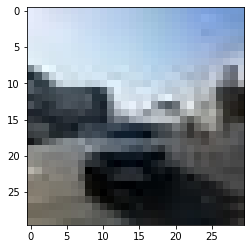

In [13]:
# 0번째 label 및 이미지 확인
print(y.iloc[0])
plt.imshow(X.iloc[0].values.astype(np.int).reshape(30,30,3)) # (32,32,3)으로 변환

G80스포츠


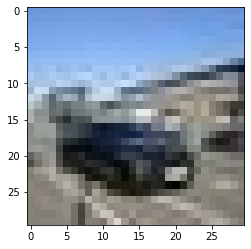

In [14]:
# 200번째 label 및 이미지 확인
print(y.iloc[200])
plt.imshow(X.iloc[200].values.astype(np.int).reshape(30,30,3))

G80스포츠


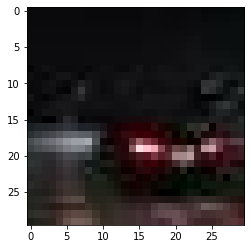

In [15]:
# 400번째 label 및 이미지 확인
print(y.iloc[400])
plt.imshow(X.iloc[400].values.astype(np.int).reshape(30,30,3))

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y

array([ 0,  0,  0, ..., 33, 33, 33])

In [ ]:
#with open('y.pkl', 'wb') as f:
#    pickle.dump(y, f)

In [34]:
from sklearn.model_selection import train_test_split
X,X_del,y,y_del = train_test_split(X,y,test_size=0.5,random_state=1, stratify=y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=1,stratify=y)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = 1, stratify = y_train)

In [25]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1, stratify=y)
#X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state=1,stratify=y_train)
#X_train.shape, X_val.shape,X_test.shape, y_train.shape,y_val.shape, y_test.shape'''

((15945, 2700), (3987, 2700), (4984, 2700), (15945,), (3987,), (4984,))

In [17]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1, stratify=y)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19932, 2700), (4984, 2700), (19932,), (4984,))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b19d80860>]],
      dtype=object)

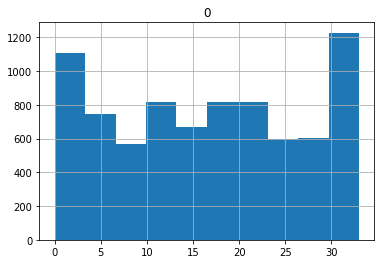

In [35]:
pd.DataFrame(y_train).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b165c1240>]],
      dtype=object)

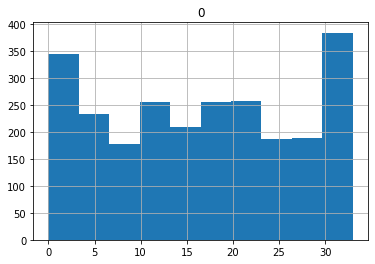

In [36]:
pd.DataFrame(y_test).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b1a1ed5c0>]],
      dtype=object)

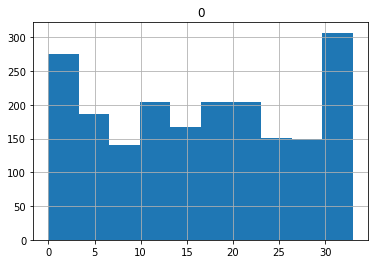

In [37]:
pd.DataFrame(y_val).hist()

In [20]:
# 샘플 모델 3개 : Logistic Regression, SVC, Perceptron
def RunModel(model, X_train, y_train, X_test, y_test):
    clf = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return clf, pred

lr = LogisticRegression()
clf, y_pred = RunModel(lr, X_train, y_train, X_test, y_test)

# svc = SVC()
# clf_svc, y_pred_svc = RunModel(svc, X_train, y_train, X_test, y_test)

# perc = Perceptron(tol=1e-3, random_state=0)
# clf_perc, y_pred_perc = RunModel(perc, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
svc = SVC()
clf_svc, y_pred_svc = RunModel(svc, X_train, y_train, X_test, y_test)

KeyboardInterrupt: ignored

In [44]:
#eta=1.0, tol=1e-3
perc = Perceptron(eta0=1,tol=1e-3, random_state=0)
clf_perc, y_pred_perc = RunModel(perc, X_train, y_train, X_test, y_test)
print("Perceptron Accuracy:", metrics.accuracy_score(y_test, y_pred_perc))

Perceptron Accuracy: 0.11133400200601805


In [46]:
#eta=0.1, tol=1e-3
perc = Perceptron(eta0=0.1, tol=1e-3, random_state=0)
clf_perc, y_pred_perc = RunModel(perc, X_train, y_train, X_test, y_test)
print("Perceptron Accuracy:", metrics.accuracy_score(y_val, y_pred_perc))

Perceptron Accuracy: 0.11133400200601805


In [50]:
#eta=0.5, tol=1e-3
perc = Perceptron(eta0=0.5, tol=1e-3, random_state=0)
clf_perc, y_pred_perc = RunModel(perc, X_train, y_train, X_test, y_test)
print("Perceptron Accuracy:", metrics.accuracy_score(y_val, y_pred_perc))

Perceptron Accuracy: 0.11133400200601805


In [54]:
#eta=1.0, tol=1e-5
perc = Perceptron(eta0=1,tol=1e-5, random_state=0)
clf_perc, y_pred_perc = RunModel(perc, X_train, y_train, X_test, y_test)
print("Perceptron Accuracy:", metrics.accuracy_score(y_test, y_pred_perc))

Perceptron Accuracy: 0.11133400200601805


In [52]:
#eta=1.0, tol=0.1
perc = Perceptron(eta0=1,tol=0.1, random_state=0)
clf_perc, y_pred_perc = RunModel(perc, X_train, y_train, X_test, y_test)
print("Perceptron Accuracy:", metrics.accuracy_score(y_test, y_pred_perc))

Perceptron Accuracy: 0.1187800963081862


In [56]:
#eta=1.0, tol=0.5
perc = Perceptron(eta0=1,tol=0.5, random_state=0)
clf_perc, y_pred_perc = RunModel(perc, X_train, y_train, X_test, y_test)
print("Perceptron Accuracy:", metrics.accuracy_score(y_test, y_pred_perc))

Perceptron Accuracy: 0.11133400200601805


In [21]:
# y_test = le.inverse_transform(y_test)
# y_pred = le.inverse_transform(y_pred)
# y_pred_svc = le.inverse_transform(y_pred_svc)
# y_pred_perc = le.inverse_transform(y_pred_perc)

In [43]:
from sklearn import metrics
#print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# print("SVC Accuracy:", metrics.accuracy_score(y_test, y_pred_svc))
print("Perceptron Accuracy:", metrics.accuracy_score(y_val, y_pred_perc))

Perceptron Accuracy: 0.11133400200601805


정답: ['에쿠스']
모델 결과: ['G90']


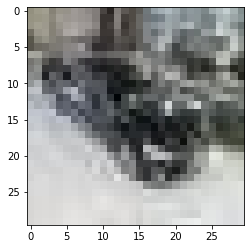

In [23]:
import random
t = random.randint(0, len(X_test)-1)
# 0번째 테스트 label 및 이미지 확인
print("정답:", le.inverse_transform([y_test[0]]))
print("모델 결과:", le.inverse_transform([y_pred[0]]))
# print("SVC 모델 결과:", y_pred_svc[0])
# print("Perceptron 모델 결과:", y_pred_perc[0])
plt.imshow(X_test.iloc[0].values.astype(np.int).reshape(30,30,3)) # (32,32,3)으로 변환